In [1]:
import matplotlib.pyplot as plt
import cartopy
import cartopy.io.shapereader as shpreader
import cartopy.crs as ccrs
import numpy as np
from shapely import Point
from itertools import product


In [ ]:
codes = [
    ("BR-CS", 5.6),
    ("CA-ON", 9.75),
    ("CH", 1),
    ("DE", 1.38),
    ("PL", 1.25),
    ("BE", 1),
    ("IT-NO", 1.2),
    ("CA-QC", 9.75),
    ("ES", 1.5),
    ("GB", 1.25),
    ("FI", 1.5),
    ("FR", 1.6),
    ("NL", 1),
]

In [8]:
def get_points_over_country(country_code, points_step):
    """
    This func gets country ISO-3 code, distance between points and returns evenly spaced points list (longitude, latitude).

    Look for country code: https://en.wikipedia.org/wiki/ISO_3166-1_alpha-3
    """
    shpfilename = shpreader.natural_earth(resolution='10m',
                                          category='cultural',
                                          name='admin_0_countries')
    reader = shpreader.Reader(shpfilename)
    countries = reader.records()

    for country in countries:
        if country.attributes['ADM0_A3'] == country_code:
            break

    min_longitude, min_latitude, max_longitude, max_latitude = country.geometry.bounds

    points = []
    for longitude, latitude in product(np.arange(min_longitude, max_longitude, points_step), np.arange(min_latitude, max_latitude, points_step)):
        # checking points in the grid (within country boundaries) with step = points_step
        if Point((longitude, latitude)).within(country.geometry):
            points.append((longitude, latitude))
        else:
            # check if we can move point a bit
            max_shift = points_step / 5
            for long_dif, lat_dif in product(np.linspace(-max_shift, max_shift, 3), repeat=2):
                if Point((longitude + long_dif, latitude + lat_dif)).within(country.geometry):
                    points.append((longitude + long_dif, latitude + lat_dif))
                    break

    return points


denmark_points = get_points_over_country(country_code='DEU', points_step=1.38)
len(denmark_points)


30

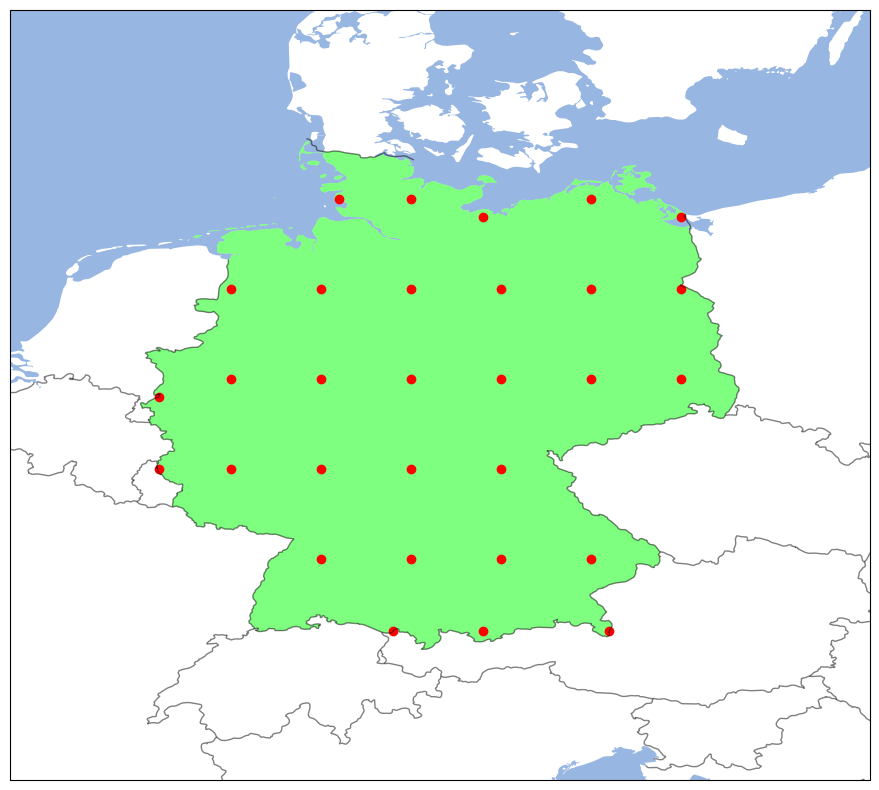

In [9]:
def visualize_points(country_code, points):
    """
    This func gets country ISO-3 code and list of points (longitude, latitude) and visualizes it with matplotlib.

    Look for country code: https://en.wikipedia.org/wiki/ISO_3166-1_alpha-3
    """
    plt.figure(figsize=(15, 10))
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.add_feature(cartopy.feature.OCEAN)
    ax.add_feature(cartopy.feature.BORDERS, linestyle='-', alpha=.5)

    shpfilename = shpreader.natural_earth(resolution='10m',
                                          category='cultural',
                                          name='admin_0_countries')
    reader = shpreader.Reader(shpfilename)
    countries = reader.records()

    for country in countries:
        if country.attributes['ADM0_A3'] == country_code:
            ax.add_geometries(country.geometry, ccrs.PlateCarree(),
                              facecolor=(0, 1, 0),
                              alpha=0.5,
                              zorder=0)
            break

    min_longitude, min_latitude, max_longitude, max_latitude = country.geometry.bounds
    ax.set_extent([min_longitude-2, max_longitude +
                   2, min_latitude-2, max_latitude+2])

    xs = [point[0] for point in points]
    ys = [point[1] for point in points]
    ax.scatter(xs, ys, c='r', zorder=1)
    plt.show()


visualize_points('DEU', denmark_points)


201


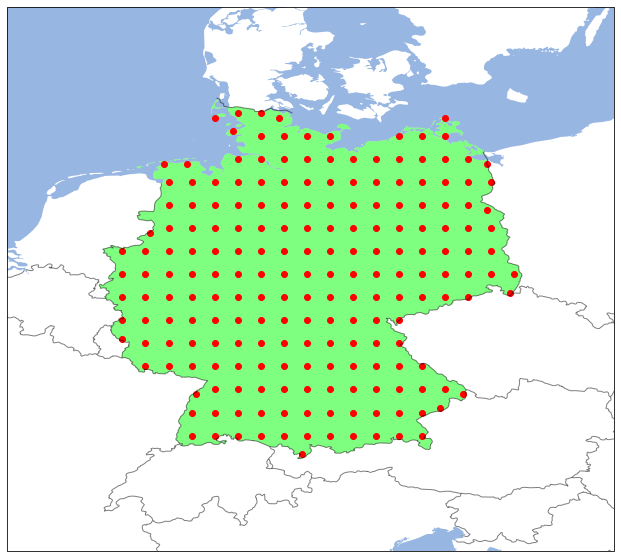

In [26]:
germany_points = get_points_over_country(country_code='DEU', points_step=0.5)
print(len(germany_points))
visualize_points('DEU', germany_points)
